# Lab 01: Urbana Weather

---
author: Jakub Szumny
date: September 6, 2024
embed-resources: true
---

## Introduction

Being the manager for the Market at the Square, Urban's local Farmer's Market, each year the market moves from the outdoors to the indoors, and I would like to be able to predict when to be able to make the move, so that everyone is well prepared. I have been tasked with finding a model for the minimum daily temperature so that I can predict when it will be too cold to hold the market outdoors.

## Methods

In [32]:
# imports
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [33]:
# load data
weather_train = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-train.csv",
    index_col="date",
    parse_dates=True
)
weather_vtrain = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-vtrain.csv",
    index_col="date",
    parse_dates=True
)
weather_validation = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-validation.csv",
    index_col="date",
    parse_dates=True
)
weather_test = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-test.csv",
    index_col="date",
    parse_dates=True
)

In [34]:
weather_train


,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2021-12-27,6.9980,2021,12,27,361
2021-12-28,1.7980,2021,12,28,362
2021-12-29,2.1980,2021,12,29,363


This data is historical weather data, collected using Open_Meteo API. Each dataset are split according to time. The data includes a response, being "temperture_2m_min", and features being "year", "month", "day", "day_of_year", but for this lab we only require use of the "year" and "day_of_year" features.

In [35]:
# summary statistics
print("2016: ", len(weather_train[weather_train.year == 2016]))
print(weather_train[weather_train.year == 2016]["temperature_2m_min"].mean())
print(weather_train[weather_train.year == 2016]["temperature_2m_min"].std())

print("2017: ", len(weather_train[weather_train.year == 2017]))
print(weather_train[weather_train.year == 2017]["temperature_2m_min"].mean())
print(weather_train[weather_train.year == 2017]["temperature_2m_min"].std())

print("2018: ", len(weather_train[weather_train.year == 2018]))
print(weather_train[weather_train.year == 2018]["temperature_2m_min"].mean())
print(weather_train[weather_train.year == 2018]["temperature_2m_min"].std())

print("2019: ", len(weather_train[weather_train.year == 2019]))
print(weather_train[weather_train.year == 2019]["temperature_2m_min"].mean())
print(weather_train[weather_train.year == 2019]["temperature_2m_min"].std())

print("2020: ", len(weather_train[weather_train.year == 2020]))
print(weather_train[weather_train.year == 2020]["temperature_2m_min"].mean())
print(weather_train[weather_train.year == 2020]["temperature_2m_min"].std())

print("2021: ", len(weather_train[weather_train.year == 2021]))
print(weather_train[weather_train.year == 2021]["temperature_2m_min"].mean())
print(weather_train[weather_train.year == 2021]["temperature_2m_min"].std())


2016:  366
8.793390534909836
10.274505505649106
2017:  365
8.399643825452054
9.692304500104685
2018:  365
7.591013689450411
11.369451874149723
2019:  365
7.229780811287672
10.88225965018401
2020:  366
7.684612014247814
9.38359314925545
2021:  365
8.119369859643836
10.388489289499418


In [36]:
print("month 1")
print(weather_train[weather_train.month == 1]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 1]["temperature_2m_min"].std())

print("month 2")
print(weather_train[weather_train.month == 2]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 2]["temperature_2m_min"].std())

print("month 3")
print(weather_train[weather_train.month == 3]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 3]["temperature_2m_min"].std())

print("month 4")
print(weather_train[weather_train.month == 4]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 4]["temperature_2m_min"].std())

print("month 5")
print(weather_train[weather_train.month == 5]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 5]["temperature_2m_min"].std())

print("month 6")
print(weather_train[weather_train.month == 6]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 6]["temperature_2m_min"].std())

print("month 7")
print(weather_train[weather_train.month == 7]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 7]["temperature_2m_min"].std())

print("month 8")
print(weather_train[weather_train.month == 8]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 8]["temperature_2m_min"].std())

print("month 9")
print(weather_train[weather_train.month == 9]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 9]["temperature_2m_min"].std())

print("month 10")
print(weather_train[weather_train.month == 10]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 10]["temperature_2m_min"].std())

print("month 11")
print(weather_train[weather_train.month == 11]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 11]["temperature_2m_min"].std())

print("month 12")
print(weather_train[weather_train.month == 12]["temperature_2m_min"].mean())
print(weather_train[weather_train.month == 12]["temperature_2m_min"].std())



month 1
-4.999336024275807
6.752005953518455
month 2
-3.85620881649
6.760570391851505
month 3
1.5772768869892475
5.6152123291691085
month 4
5.985861120222223
5.615279434163861
month 5
12.446631715591398
5.342291193817449
month 6
18.240583244444448
3.4926871945983287
month 7
19.975932629032258
2.632968793927053
month 8
19.136954204301073
2.8891179721330853
month 9
16.793083272222223
3.8157793540988205
month 10
10.102276843709678
5.852141713114067
month 11
1.780861123611111
5.523112824638673
month 12
-2.210357530969355
5.433891013192055


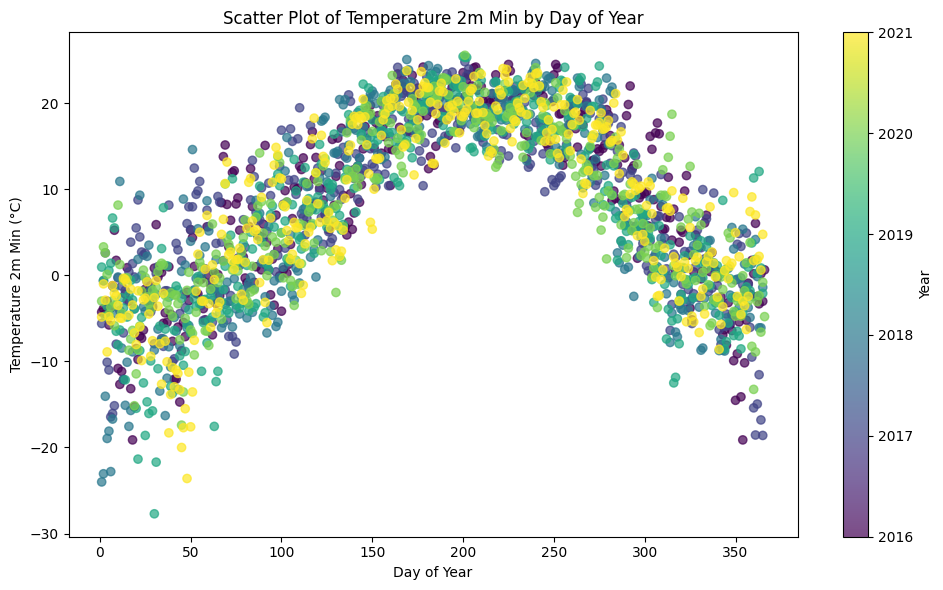

In [37]:
# visualizations
plt.figure(figsize=(10, 6))

plt.scatter(weather_train['day_of_year'], weather_train['temperature_2m_min'], 
            c=weather_train['year'], cmap='viridis', alpha=0.7)

plt.colorbar(label='Year')
plt.xlabel('Day of Year')
plt.ylabel('Temperature 2m Min (°C)')
plt.title('Scatter Plot of Temperature 2m Min by Day of Year')

plt.tight_layout()
plt.show()

Based off of the summary statistics and the visualization, we can see if it is earlier in the year, or later in the year, the temperature seems to be much colder. This shows a direct correlation with day of year, and temperature, with sometimes different years having slightly different temperatures, but we see an arch shape appear showing that it tends to be the same. So if it is earlier in the year it is much colder, and if it is later in the year it is also much colder. When it is around the middle of the year it is much warmer.

### Models

In [38]:
# process data for ML
# create X and y for train
X_train = weather_train[["year", "day_of_year"]]
y_train = weather_train["temperature_2m_min"]

# create X and y for validation-train
X_vtrain = weather_vtrain[["year", "day_of_year"]]
y_vtrain = weather_vtrain["temperature_2m_min"]

# create X and y for validation
X_validation = weather_validation[["year", "day_of_year"]]
y_validation = weather_validation["temperature_2m_min"]

# create X and y for test
X_test = weather_test[["year", "day_of_year"]]
y_test = weather_test["temperature_2m_min"]

In [39]:
# initialize model
knn = KNeighborsRegressor(n_neighbors= 5)

# fit model
knn.fit(X_vtrain, y_vtrain)

# make some predictions
pred_val = knn.predict(X_validation)

# calculate validation rmse
root_mean_squared_error(y_validation, pred_val)


5.493198256442704

In [40]:
# find the best k value
best_k = 0
for i in range(1,100,5):
    knn = KNeighborsRegressor(n_neighbors= i)
    knn.fit(X_vtrain, y_vtrain)
    pred_val = knn.predict(X_validation)
    rmse = root_mean_squared_error(y_validation, pred_val)

    high = 0
    if rmse > high:
        best_k = i
        high = rmse
    
print(best_k)

96


Here I used a KNearest Neighbors Regression model,but I ran a loop in order to find the K value with the best RMSE.

In [41]:
# train models
knn = KNeighborsRegressor(n_neighbors= 96)

# fit model
knn.fit(X_vtrain, y_vtrain)

# make some predictions
pred_val = knn.predict(X_validation)

# calculate validation rmse
root_mean_squared_error(y_validation, pred_val)

from joblib import dump
dump(knn, "urbana-weather.joblib")

['urbana-weather.joblib']

## Results

In [42]:
# report model metrics
print(root_mean_squared_error(y_validation, pred_val))

4.708067056660213


The KnearestNeighbors Regression model with n = 96, achieves an RMSE of 4.71

## Discussion

While an RMSE of 4.708, is better than the baseline of 5.49, the model still isn't perfect.

We could consider the data splitting procedure, as for this model it was based on time, but maybe not splitting it that way could give us different results. Even the slightest changes in how the data is split, could make a huge impact on the quality of the model.

I believe this model is good, but definitely is not ready for use in practice in the real world as it can be improved greatly, and a different model might work with this specific data better.

The overall strategy seems appropriate, as basing the time of the year and year, vs the temperature is a strong correlation, but there definitely are many more factors that can affect the weather, so maybe more data could be used.

Distance does not technically make sense in this scenario, as the difference between time is not a distance, but an amount of time. Sure it can work and still use this model, but it doesn't fully make sense.

### Conclusion

Given the average performance, along with some other issues that I have mentioned, I would not reccomend this model for use in practice at this time.